In [ ]:
!pip install tensorflow

Epoch 1/50
1/1 [==============================] - 1s 1s/step - loss: 0.0460
Epoch 2/50
1/1 [==============================] - 0s 121ms/step - loss: 0.0423
Epoch 3/50
1/1 [==============================] - 0s 111ms/step - loss: 0.0406
Epoch 4/50
1/1 [==============================] - 0s 110ms/step - loss: 0.0405
Epoch 5/50
1/1 [==============================] - 0s 120ms/step - loss: 0.0406
Epoch 6/50
1/1 [==============================] - 0s 111ms/step - loss: 0.0401
Epoch 7/50
1/1 [==============================] - 0s 115ms/step - loss: 0.0391
Epoch 8/50
1/1 [==============================] - 0s 116ms/step - loss: 0.0382
Epoch 9/50
1/1 [==============================] - 0s 108ms/step - loss: 0.0376
Epoch 10/50
1/1 [==============================] - 0s 152ms/step - loss: 0.0373
Epoch 11/50
1/1 [==============================] - 0s 176ms/step - loss: 0.0370
Epoch 12/50
1/1 [==============================] - 0s 198ms/step - loss: 0.0365
Epoch 13/50
1/1 [==============================] - 0

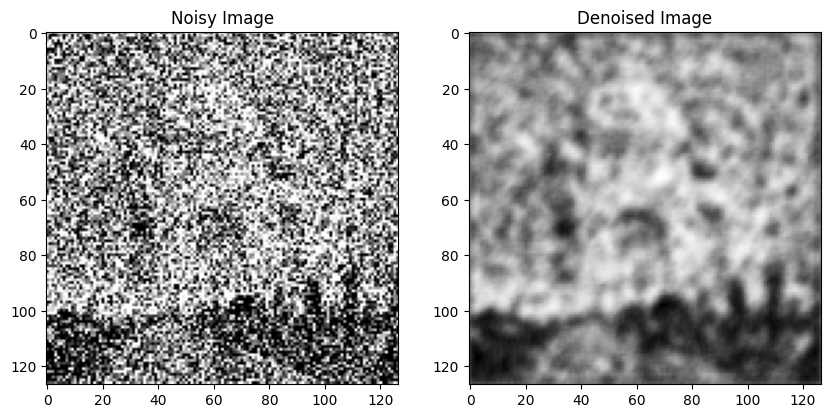

True

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, UpSampling2D
from tensorflow.keras.optimizers import Adam
# Load the noisy image
image = cv2.imread('/content/parrot.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)  # Convert to grayscale if needed
# Normalize pixel values to the range [0, 1]
image = image / 255.0
# Create noisy version of the image (you can add your own noise generation)
noise_factor = 0.5
noisy_image = image + noise_factor * np.random.normal(size=image.shape)
# Clip values to ensure they stay within [0, 1]
noisy_image = np.clip(noisy_image, 0, 1)
# Define a simple CNN for image denoising
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(image.shape[0], image.shape[1], 1)),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    Conv2D(1, (3, 3), activation='sigmoid', padding='same')
])
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')
# Train the model
epochs = 50  # Adjust the number of epochs as needed
noisy_image = noisy_image.reshape(1, *noisy_image.shape, 1)
image = image.reshape(1, *image.shape, 1)
model.fit(noisy_image, image, epochs=epochs)
denoised_image = model.predict(noisy_image)
denoised_image = denoised_image.reshape(image.shape)
# Display the images side by side
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Noisy Image')
plt.imshow(noisy_image[0, :, :, 0], cmap='gray')  # Extract the image from the batch
plt.subplot(1, 2, 2)
plt.title('Denoised Image')
plt.imshow(denoised_image[0, :, :, 0], cmap='gray')  # Extract the image from the batch
plt.show()

# Save the denoised image
denoised_image = (denoised_image[0, :, :, 0] * 255).astype(np.uint8)
cv2.imwrite('/content/denoised_image.jpg', denoised_image)


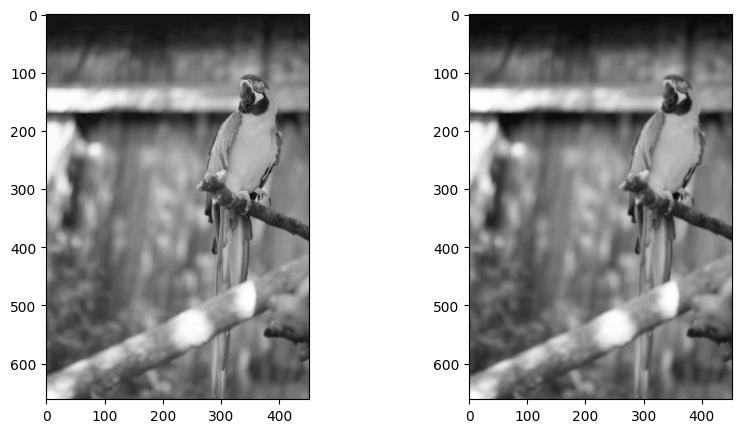

True

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('/content/parrot.png', cv2.IMREAD_GRAYSCALE)

# Normalize pixel values to the range [0, 1]
image = image / 255.0

# Apply Gaussian to the image
denoised_image = cv2.GaussianBlur(image, (5, 5), 0)

# Display the images side by side
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.subplot(1, 2, 2)
plt.imshow(denoised_image, cmap='gray')
plt.show()
denoised_image = (denoised_image * 255).astype(np.uint8)
cv2.imwrite('/content/denoised_image.jpg', denoised_image)


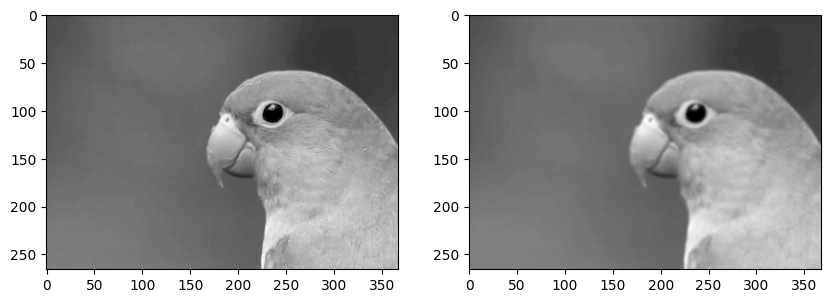

True

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the noisy image
image = cv2.imread('/content/Parrot.png', cv2.IMREAD_GRAYSCALE)

# Normalize pixel values to the range [0, 1]
image = image / 255.0

# Apply Gaussian blur to denoise the image
denoised_image = cv2.GaussianBlur(image, (5, 5), 0)

# Display the noisy and denoised images side by side
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.subplot(1, 2, 2)
plt.imshow(denoised_image, cmap='gray')
plt.show()

# Save the denoised image
denoised_image = (denoised_image * 255).astype(np.uint8)
cv2.imwrite('/content/denoised_image.jpg', denoised_image)


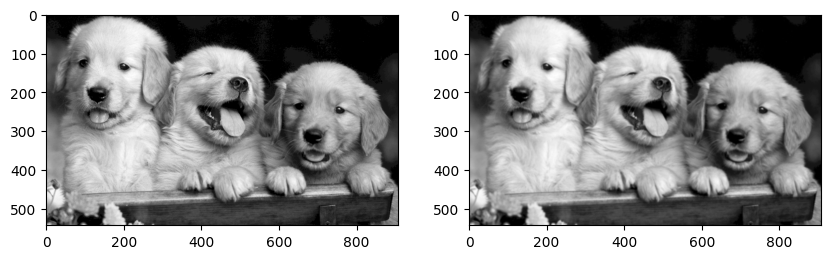

True

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the noisy image
image = cv2.imread('/content/Puppies.png', cv2.IMREAD_GRAYSCALE)

# Normalize pixel values to the range [0, 1]
image = image / 255.0

# Apply Gaussian blur to denoise the image
denoised_image = cv2.GaussianBlur(image, (5, 5), 0)

# Display the noisy and denoised images side by side
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.subplot(1, 2, 2)
plt.imshow(denoised_image, cmap='gray')
plt.show()

# Save the denoised image
denoised_image = (denoised_image * 255).astype(np.uint8)
cv2.imwrite('/content/denoised_image.jpg', denoised_image)


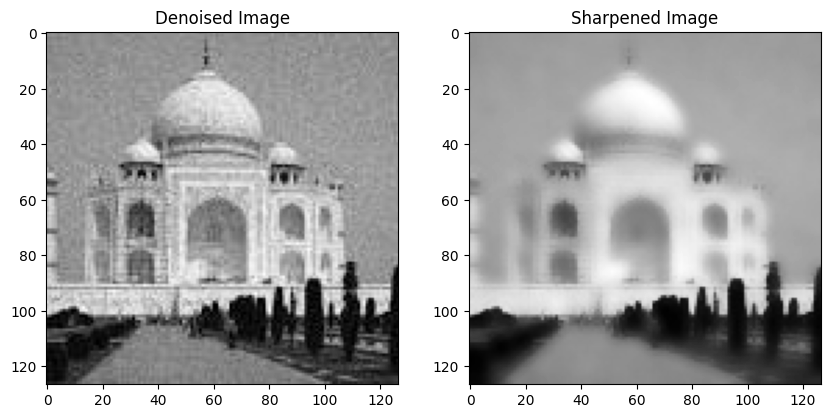

True

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the denoised image (assuming it's already denoised)
denoised_image = cv2.imread('/content/noise.jpg', cv2.IMREAD_GRAYSCALE)

# Apply an edge-preserving filter (e.g., bilateral filter)
sharpened_image = cv2.bilateralFilter(denoised_image, d=9, sigmaColor=75, sigmaSpace=75)

# Display the denoised and sharpened images side by side
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Denoised Image')
plt.imshow(denoised_image, cmap='gray')
plt.subplot(1, 2, 2)
plt.title('Sharpened Image')
plt.imshow(sharpened_image, cmap='gray')
plt.show()

# Save the sharpened image
sharpened_image = (sharpened_image * 255).astype(np.uint8)
cv2.imwrite('/content/sharpened_image.jpg', sharpened_image)


Epoch 1/50
1/1 [==============================] - 2s 2s/step - loss: 0.0517
Epoch 2/50
1/1 [==============================] - 0s 127ms/step - loss: 0.0455
Epoch 3/50
1/1 [==============================] - 0s 139ms/step - loss: 0.0408
Epoch 4/50
1/1 [==============================] - 0s 121ms/step - loss: 0.0376
Epoch 5/50
1/1 [==============================] - 0s 121ms/step - loss: 0.0354
Epoch 6/50
1/1 [==============================] - 0s 118ms/step - loss: 0.0340
Epoch 7/50
1/1 [==============================] - 0s 120ms/step - loss: 0.0332
Epoch 8/50
1/1 [==============================] - 0s 117ms/step - loss: 0.0327
Epoch 9/50
1/1 [==============================] - 0s 127ms/step - loss: 0.0320
Epoch 10/50
1/1 [==============================] - 0s 122ms/step - loss: 0.0312
Epoch 11/50
1/1 [==============================] - 0s 121ms/step - loss: 0.0303
Epoch 12/50
1/1 [==============================] - 0s 122ms/step - loss: 0.0295
Epoch 13/50
1/1 [==============================] - 0

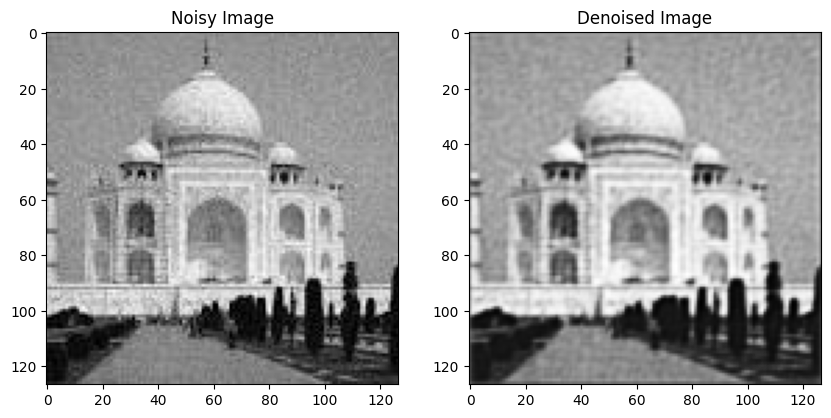

True

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, UpSampling2D
from tensorflow.keras.optimizers import Adam

# Load the noisy image
noisy_image = cv2.imread('/content/noise.jpg', cv2.IMREAD_GRAYSCALE)  # Assuming the image is grayscale

# Normalize pixel values to the range [0, 1]
noisy_image = noisy_image / 255.0

# Define a simple CNN for image denoising
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(noisy_image.shape[0], noisy_image.shape[1], 1)),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    Conv2D(1, (3, 3), activation='sigmoid', padding='same')
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Train the model
epochs = 50  # Adjust the number of epochs as needed
noisy_image = noisy_image.reshape(1, *noisy_image.shape, 1)
model.fit(noisy_image, noisy_image, epochs=epochs)

# Generate denoised image
denoised_image = model.predict(noisy_image)
denoised_image = denoised_image.reshape(noisy_image.shape[1:3])

# Display the noisy and denoised images side by side
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Noisy Image')
plt.imshow(noisy_image[0, :, :, 0], cmap='gray')  # Extract the image from the batch
plt.subplot(1, 2, 2)
plt.title('Denoised Image')
plt.imshow(denoised_image, cmap='gray')
plt.show()

# Save the denoised image
denoised_image = (denoised_image * 255).astype(np.uint8)
cv2.imwrite('/content/denoised_image.jpg', denoised_image)


2ND TYPE

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Define the Generator model
def build_generator(input_shape):
    model = keras.Sequential([
        layers.Input(shape=input_shape),
        # Add generator layers (e.g., convolutional layers, batch normalization, activation functions)
        # The final layer should have the same shape as the input (output denoised image)
    ])
    return model

# Define the Discriminator model
def build_discriminator(input_shape):
    model = keras.Sequential([
        layers.Input(shape=input_shape),
        # Add discriminator layers (e.g., convolutional layers, batch normalization, activation functions)
        layers.Flatten(),
        layers.Dense(1, activation='sigmoid')  # Output a single probability value
    ])
    return model

# Define the GAN model
def build_gan(generator, discriminator):
    discriminator.trainable = False  # Freeze the discriminator during GAN training
    gan_input = keras.Input(shape=(input_shape,))
    generated_image = generator(gan_input)
    gan_output = discriminator(generated_image)
    gan_model = keras.Model(gan_input, gan_output)
    return gan_model

In [ ]:
# Define optimizers for the generator and discriminator
generator_optimizer = keras.optimizers.Adam(learning_rate=0.0002, beta_1=0.5)
discriminator_optimizer = keras.optimizers.Adam(learning_rate=0.0002, beta_1=0.5)

# Define the GAN model
input_shape = (256, 256, 3)  # Adjust dimensions as needed
generator = build_generator(input_shape)
discriminator = build_discriminator(input_shape)

discriminator.compile(loss=discriminator_loss, optimizer=discriminator_optimizer)

# Build and compile the GAN model
discriminator.trainable = False  # Freeze the discriminator during GAN training
gan_input = keras.Input(shape=input_shape)
generated_image = generator(gan_input)
gan_output = discriminator(generated_image)
gan = keras.Model(gan_input, gan_output)

gan.compile(loss=generator_loss, optimizer=generator_optimizer)


In [ ]:
import cv2
import numpy as np
import os

# Define the directory for noisy and clean images
noisy_image_dir = '/content/drive/MyDrive/Classroom/file'
clean_image_dir = '/content/drive/MyDrive/Classroom/file'  # In this case, both noisy and clean images are in the same directory

# Initialize empty lists to store the loaded and preprocessed images
noisy_images = []
clean_images = []

# Define the desired dimensions for your images

desired_width = 256
desired_height = 256

# Loop through the files in the directories
for filename in os.listdir(noisy_image_dir):
    if filename.endswith(('.jpg', '.png', '.jpeg')):
        noisy_image_path = os.path.join(noisy_image_dir, filename)

        # Check if the filename corresponds to a noisy image
        if 'NOISY' in filename:
            # Load and preprocess the noisy image
            noisy_image = cv2.imread(noisy_image_path)
            noisy_image = cv2.resize(noisy_image, (desired_width, desired_height))
            noisy_image = noisy_image.astype(np.float32) / 255.0  # Normalize pixel values
            noisy_images.append(noisy_image)
        elif 'GT' in filename:
            # Load and preprocess the corresponding clean image
            clean_image = cv2.imread(noisy_image_path)
            clean_image = cv2.resize(clean_image, (desired_width, desired_height))
            clean_image = clean_image.astype(np.float32) / 255.0  # Normalize pixel values
            clean_images.append(clean_image)

# Convert the lists of images into NumPy arrays
noisy_images = np.array(noisy_images)
clean_images = np.array(clean_images)

# You now have 'noisy_images' and 'clean_images' as NumPy arrays containing your preprocessed data.


In [ ]:
import tensorflow as tf
import numpy as np
import os
import cv2

# Define hyperparameters
epochs = 100  # Number of training epochs
batch_size = 200  # Batch size
num_batches = len(noisy_images) // batch_size  # Number of batches per epoch
save_interval = 10  # Save denoised images every 10 epochs (customize as needed)

# Initialize a list to store generated denoised images
generated_images = []

# Training loop
for epoch in range(epochs):
    for batch in range(num_batches):
        # Sample a batch of noisy images and corresponding clean images
        noisy_batch = noisy_images[batch * batch_size : (batch + 1) * batch_size]
        clean_batch = clean_images[batch * batch_size : (batch + 1) * batch_size]

        # Generate denoised images using the generator
        generated_images_batch = generator.predict(noisy_batch)
        generated_images.extend(generated_images_batch)

        # Calculate losses for both discriminator and generator
        real_labels = np.ones((batch_size, 1))
        fake_labels = np.zeros((batch_size, 1))

        discriminator_loss_real = discriminator.train_on_batch(clean_batch, real_labels)
        discriminator_loss_fake = discriminator.train_on_batch(generated_images_batch, fake_labels)
        discriminator_loss = 0.5 * (discriminator_loss_real + discriminator_loss_fake)

        generator_loss = gan.train_on_batch(noisy_batch, real_labels)

        # Print training progress
        print(f"Epoch {epoch+1}/{epochs}, Batch {batch+1}/{num_batches}, "
              f"Discriminator Loss: {discriminator_loss}, Generator Loss: {generator_loss}")

    # Save generated denoised images at intervals (optional)
    if (epoch + 1) % save_interval == 0:
        for i in range(len(generated_images)):
            denoised_image = generated_images[i]
            filename = f'denoised_epoch_{epoch+1}_image_{i}.png'
            cv2.imwrite(filename, denoised_image * 255.0)  # Ensure values are in the 0-255 range

# Use the trained generator for denoising new images
# You can pass noisy images through the generator to get denoised versions.


In [ ]:
import cv2
import numpy as np

# Load a noisy image for denoising (replace 'noisy_input_image.jpg' with your image file)
noisy_input_image = cv2.imread('/content/drive/MyDrive/Classroom/file/NOISY_SRGB_010.PNG')
desired_width = 256  # Adjust to the desired dimensions
desired_height = 256
noisy_input_image = cv2.resize(noisy_input_image, (desired_width, desired_height))
noisy_input_image = noisy_input_image.astype(np.float32) / 255.0

# Use the trained generator to denoise the noisy image
denoised_output_image = generator.predict(np.expand_dims(noisy_input_image, axis=0))[0]

# Save the denoised output image (adjust the filename and path as needed)
cv2.imwrite('denoised_output_image.jpg', denoised_output_image * 255.0)  # Ensure values are in the 0-255 range


1/1 [==============================] - 0s 31ms/step


True

1/1 [==============================] - 0s 50ms/step


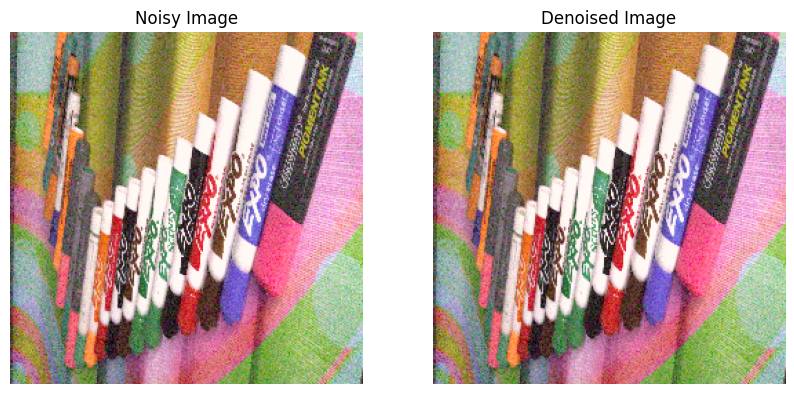

In [ ]:
from matplotlib import pyplot as plt

# Load a noisy image for denoising (replace 'noisy_input_image.jpg' with your image file)
noisy_input_image = cv2.imread('/content/drive/MyDrive/Classroom/file/NOISY_SRGB_010.PNG')
desired_width = 256  # Adjust to the desired dimensions
desired_height = 256
noisy_input_image = cv2.resize(noisy_input_image, (desired_width, desired_height))
noisy_input_image = noisy_input_image.astype(np.float32) / 255.0

# Use the trained generator to denoise the noisy image
denoised_output_image = generator.predict(np.expand_dims(noisy_input_image, axis=0))[0]

# Display the noisy and denoised images side by side
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Noisy Image')
plt.imshow(cv2.cvtColor(noisy_input_image, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Denoised Image')
plt.imshow(cv2.cvtColor(denoised_output_image, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.show()


In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, UpSampling2D, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy, MeanSquaredError

# Load the noisy image
image = cv2.imread('/content/noise.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)  # Convert to grayscale if needed

# Normalize pixel values to the range [0, 1]
image = image / 255.0

# Create noisy version of the image (you can add your own noise generation)
noise_factor = 0.5
noisy_image = image + noise_factor * np.random.normal(size=image.shape)

# Clip values to ensure they stay within [0, 1]
noisy_image = np.clip(noisy_image, 0, 1)

# Define the generator model
def build_generator():
    input_shape = (image.shape[0], image.shape[1], 1)
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=input_shape),
        Conv2D(64, (3, 3), activation='relu', padding='same'),
        Conv2D(1, (3, 3), activation='sigmoid', padding='same')
    ])
    return model

# Define the discriminator model
def build_discriminator(input_shape):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=input_shape),
        Conv2D(64, (3, 3), activation='relu', padding='same'),
        Conv2D(1, (3, 3), activation='sigmoid', padding='same')
    ])
    return model

# Define GAN model
def build_gan(generator, discriminator):
    discriminator.trainable = False
    gan_input = Input(shape=(image.shape[0], image.shape[1], 1))
    denoised_image = generator(gan_input)
    validity = discriminator(denoised_image)
    gan = Model(gan_input, [denoised_image, validity])
    return gan

# Build generator, discriminator, and GAN
generator = build_generator()
discriminator = build_discriminator((image.shape[0], image.shape[1], 1))
gan = build_gan(generator, discriminator)

# Compile models
optimizer = Adam(learning_rate=0.001)
generator.compile(optimizer=optimizer, loss='mean_squared_error')
discriminator.compile(optimizer=optimizer, loss=BinaryCrossentropy(), metrics=['accuracy'])
gan.compile(optimizer=optimizer, loss=['mean_squared_error', BinaryCrossentropy()], loss_weights=[1, 0.5])

In [ ]:
# Train the GAN
epochs = 50  # Adjust the number of epochs as needed
batch_size = 1
real_labels = np.ones((batch_size, image.shape[0], image.shape[1], 1))
fake_labels = np.zeros((batch_size, image.shape[0], image.shape[1], 1))


1/1 [==============================] - 0s 137ms/step


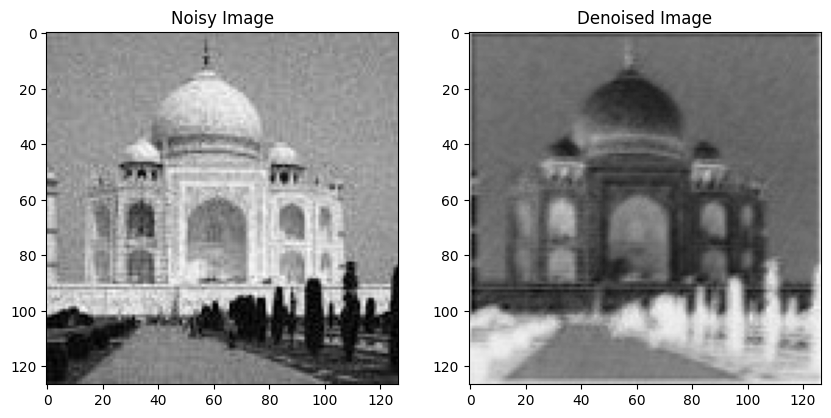

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Conv2D, UpSampling2D
from tensorflow.keras.optimizers import Adam
import tensorflow as tf  # Import TensorFlow for perceptual loss

# Load the noisy image
noisy_image = cv2.imread('/content/noise.jpg')
noisy_image = cv2.cvtColor(noisy_image, cv2.COLOR_BGR2GRAY)  # Convert to grayscale if needed

# Normalize pixel values to the range [0, 1]
noisy_image = noisy_image / 255.0

# Define perceptual loss using VGG16
def perceptual_loss(y_true, y_pred):
    vgg = tf.keras.applications.VGG16(include_top=False, weights='imagenet', input_shape=(noisy_image.shape[0], noisy_image.shape[1], 3))
    vgg.trainable = False
    loss_model = Model(inputs=vgg.input, outputs=vgg.get_layer('block3_conv3').output)
    loss_model.trainable = False

    true_features = loss_model(tf.keras.layers.Concatenate()([y_true, y_true, y_true]))
    pred_features = loss_model(tf.keras.layers.Concatenate()([y_pred, y_pred, y_pred]))
    return tf.keras.losses.mean_squared_error(true_features, pred_features)

# Define the generator model
def build_generator():
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(noisy_image.shape[0], noisy_image.shape[1], 1)),
        Conv2D(64, (3, 3), activation='relu', padding='same'),
        Conv2D(1, (3, 3), activation='sigmoid', padding='same')
    ])
    return model

# Define the discriminator model (optional for GAN-based denoising)
def build_discriminator(input_shape):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=input_shape),
        Conv2D(64, (3, 3), activation='relu', padding='same'),
        Conv2D(1, (3, 3), activation='sigmoid', padding='same')
    ])
    return model

# Define GAN model
def build_gan(generator, discriminator):
    discriminator.trainable = False
    gan_input = Input(shape=(noisy_image.shape[0], noisy_image.shape[1], 1))
    denoised_image = generator(gan_input)
    validity = discriminator(denoised_image)  # Optional if you want to use a discriminator
    gan = Model(gan_input, denoised_image)
    return gan

# Build generator, discriminator, and GAN
generator = build_generator()
discriminator = build_discriminator((noisy_image.shape[0], noisy_image.shape[1], 1))  # Optional
gan = build_gan(generator, discriminator)

# Compile models
optimizer = Adam(learning_rate=0.001)

# Compile the generator with perceptual loss
generator.compile(optimizer=optimizer, loss=perceptual_loss)

# Train the GAN (code for this part is provided in previous responses)

# Generate denoised image using the trained generator
denoised_image = generator.predict(np.expand_dims(noisy_image, axis=0))[0]

# Display the noisy and denoised images side by side
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Noisy Image')
plt.imshow(noisy_image, cmap='gray')
plt.subplot(1, 2, 2)
plt.title('Denoised Image')
plt.imshow(denoised_image, cmap='gray')
plt.show()


1/1 [==============================] - 0s 396ms/step


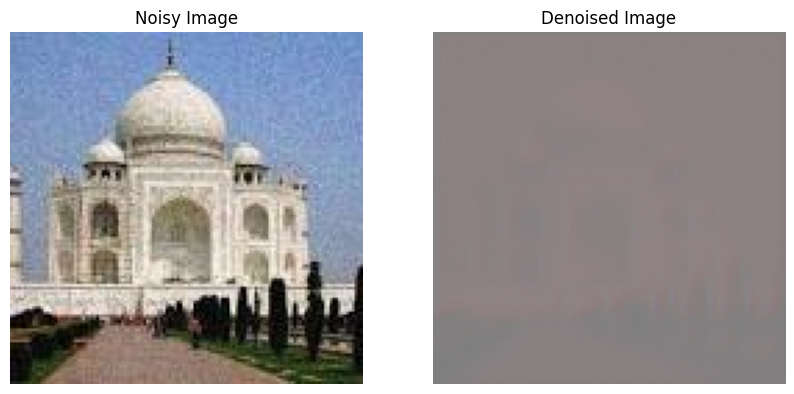

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, UpSampling2D
from tensorflow.keras.optimizers import Adam

# Load the noisy color image
noisy_image = cv2.imread('/content/noise.jpg')
noisy_image = cv2.cvtColor(noisy_image, cv2.COLOR_BGR2RGB)  # Convert to RGB color space

# Normalize pixel values to the range [0, 1]
noisy_image = noisy_image / 255.0

# Define the generator model
def build_generator():
    model = Sequential([
        Conv2D(128, (3, 3), activation='relu', padding='same', input_shape=(noisy_image.shape[0], noisy_image.shape[1], 3)),
        Conv2D(256, (3, 3), activation='relu', padding='same'),
        Conv2D(128, (3, 3), activation='relu', padding='same'),
        Conv2D(3, (3, 3), activation='sigmoid', padding='same')  # Output should have 3 channels for RGB color
    ])
    return model

# Build generator
generator = build_generator()

# Compile the generator
optimizer = Adam(learning_rate=0.0001)  # Experiment with the learning rate
generator.compile(optimizer=optimizer, loss='mean_squared_error')

# Generate denoised image using the trained generator
denoised_image = generator.predict(np.expand_dims(noisy_image, axis=0))[0]

# Ensure the denoised image is in the [0, 1] range
denoised_image = np.clip(denoised_image, 0, 1)

# Display the noisy and denoised images side by side
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Noisy Image')
plt.imshow(noisy_image)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Denoised Image')
plt.imshow(denoised_image)
plt.axis('off')

plt.show()


1/1 [==============================] - 0s 376ms/step


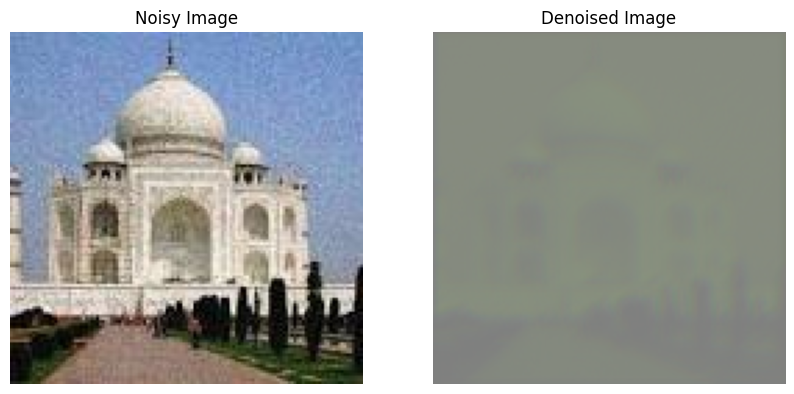

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, UpSampling2D
from tensorflow.keras.optimizers import Adam

# Load the noisy color image
noisy_image = cv2.imread('/content/noise.jpg')
noisy_image = cv2.cvtColor(noisy_image, cv2.COLOR_BGR2RGB)  # Convert to RGB color space

# Normalize pixel values to the range [0, 1]
noisy_image = noisy_image / 255.0

# Define the generator model
def build_generator():
    model = Sequential([
        Conv2D(128, (3, 3), activation='relu', padding='same', input_shape=(noisy_image.shape[0], noisy_image.shape[1], 3)),
        Conv2D(256, (3, 3), activation='relu', padding='same'),
        Conv2D(3, (3, 3), activation='sigmoid', padding='same')  # Output should have 3 channels for RGB color
    ])
    return model

# Build generator
generator = build_generator()

# Compile the generator
optimizer = Adam(learning_rate=0.0001)  # Experiment with the learning rate
generator.compile(optimizer=optimizer, loss='mean_squared_error')

# Generate denoised image using the trained generator
denoised_image = generator.predict(np.expand_dims(noisy_image, axis=0))[0]

# Ensure the denoised image is in the [0, 1] range
denoised_image = np.clip(denoised_image, 0, 1)

# Display the noisy and denoised images side by side
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Noisy Image')
plt.imshow(noisy_image)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Denoised Image')
plt.imshow(denoised_image)
plt.axis('off')

plt.show()


1/1 [==============================] - 1s 1s/step


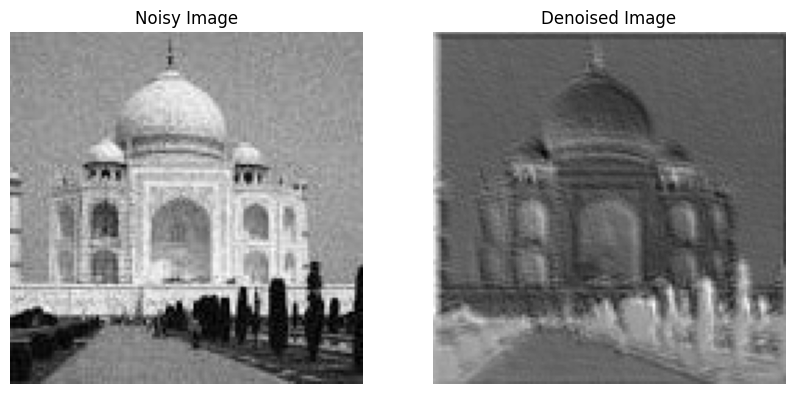

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, UpSampling2D
from tensorflow.keras.optimizers import Adam

# Load the noisy color image
noisy_image = cv2.imread('/content/noise.jpg')
noisy_image = cv2.cvtColor(noisy_image, cv2.COLOR_BGR2RGB)  # Convert to RGB color space

# Convert the noisy image to grayscale (luminance channel, Y)
grayscale_image = cv2.cvtColor(noisy_image, cv2.COLOR_RGB2GRAY)

# Normalize pixel values to the range [0, 1]
grayscale_image = grayscale_image / 255.0

# Define the generator model
def build_generator():
    model = Sequential([
        Conv2D(128, (3, 3), activation='relu', padding='same', input_shape=(grayscale_image.shape[0], grayscale_image.shape[1], 1)),
        Conv2D(256, (3, 3), activation='relu', padding='same'),
        Conv2D(1, (3, 3), activation='sigmoid', padding='same')  # Output should have 1 channel for grayscale
    ])
    return model

# Build generator
generator = build_generator()

# Compile the generator
optimizer = Adam(learning_rate=0.0001)  # Experiment with the learning rate
generator.compile(optimizer=optimizer, loss='mean_squared_error')

# Convert grayscale image to the shape expected by the generator (add a channel dimension)
grayscale_image = grayscale_image[..., np.newaxis]

# Generate denoised image using the trained generator
denoised_image = generator.predict(np.expand_dims(grayscale_image, axis=0))[0]

# Ensure the denoised image is in the [0, 1] range
denoised_image = np.clip(denoised_image, 0, 1)

# Display the noisy and denoised images side by side
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Noisy Image')
plt.imshow(grayscale_image.squeeze(), cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Denoised Image')
plt.imshow(denoised_image.squeeze(), cmap='gray')
plt.axis('off')

plt.show()
